# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [27]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
validation_file='/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p'
testing_file = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [28]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)




(34799, 32, 32, 3)
(34799,)
(12630, 32, 32, 3)
(12630,)


In [29]:
import cv2
def normalize(data):
    #data_mean = np.mean(data)
    #data_std = np.std(data)
    #new_data = (data - data_mean) / data_std
    print (len(data))
    new_data = np.array(data/255.0 - 0.5)
    return new_data

#def rgb2gray(data):
    
#    gray_images = np.zeros(shape=(len(data),32,32))
#
#
#    for i in range(0,len(data)):
#        gray_image[i] = cv2.cvtColor(data[i],cv2.COLOR_RGB2GRAY)
        

def rgb2gray(data):
    gray = np.dot(data[...,:3],[0.299,0.587,0.114])
    return gray
    

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

9


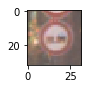

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [31]:
#X_train_gray = np.zeros(shape=(len(X_train),32,32))
#print (X_train.shape)
X_train_gray = rgb2gray(X_train)
X_valid_gray = rgb2gray(X_valid)
X_test_gray = rgb2gray(X_test)

X_train = normalize(X_train_gray)
X_valid = normalize(X_valid_gray)
X_test = normalize(X_test_gray)




34799
4410
12630


In [32]:

print (X_train[0].mean())
print ((X_train < -0.5).any())
print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)

-0.327240977328
False
(34799, 32, 32)
(4410, 32, 32)
(12630, 32, 32)


In [33]:
X_train = np.reshape(X_train,[-1,32,32,1])
X_valid = np.reshape(X_valid,[-1,32,32,1])
X_test = np.reshape(X_test,[-1,32,32,1])
print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
#X_train_norm = np.reshape(X_train_norm,[-1,32,32,1])
#X_valid_norm = np.reshape(X_valid_norm,[-1,32,32,1])

#print (X_train_norm.shape)


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [34]:
from sklearn.utils import shuffle

#X_train, y_train = shuffle(X_train, y_train)

X_train, y_train = shuffle(X_train, y_train)

#p = np.random.permutation(len(X_train_norm))
#X_train_norm,y_train = X_train_norm[p], y_train[p]

4


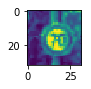

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [47]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 100

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [48]:
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 16x16x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # SOLUTION: Layer 2: Convolutional. Output = 8x8x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 16x16x32. Output = 8x8x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    
    # SOLUTION: Layer 3: Convolutional. Output = 4x4x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 8x8x64. Output = 4x4x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # SOLUTION: Flatten. Input = 4x4x64. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [49]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [50]:
rate = 0.0007

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [51]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.668

EPOCH 2 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.884

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.917

EPOCH 6 ...
Validation Accuracy = 0.910

EPOCH 7 ...
Validation Accuracy = 0.928

EPOCH 8 ...
Validation Accuracy = 0.925

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.931

EPOCH 11 ...
Validation Accuracy = 0.934

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.937

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 20 ...
Validation Accuracy = 0.944

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.944

EPOCH 23 ...
Validation Accuracy = 0.948

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

Test Accuracy = 0.938


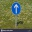

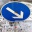

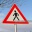

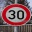

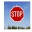

In [54]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image,display

import os
directory = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/five-images'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"): 
        input_path = os.path.join(directory, filename)
        img = cv2.imread(input_path)
        #print (img)
        display(Image(input_path))
        data = np.array([mpimg.imread(os.path.join(directory, name)) for name in os.listdir(directory)], dtype=np.float64)

In [26]:
print (data[4])

[[[ 254.  255.  255.]
  [ 255.  255.  253.]
  [ 255.  255.  251.]
  ..., 
  [ 251.  251.  255.]
  [ 251.  255.  255.]
  [ 247.  255.  246.]]

 [[ 250.  252.  255.]
  [ 255.  253.  255.]
  [ 255.  255.  253.]
  ..., 
  [ 166.  179.  223.]
  [ 221.  237.  250.]
  [ 247.  255.  244.]]

 [[ 254.  252.  255.]
  [ 255.  254.  255.]
  [ 255.  254.  250.]
  ..., 
  [ 100.  124.  198.]
  [ 199.  216.  246.]
  [ 248.  255.  244.]]

 ..., 
 [[ 255.  251.  250.]
  [ 255.  250.  252.]
  [ 254.  255.  255.]
  ..., 
  [ 207.  198.  183.]
  [ 241.  242.  228.]
  [ 247.  255.  241.]]

 [[ 255.  250.  248.]
  [ 255.  255.  253.]
  [ 249.  255.  255.]
  ..., 
  [ 255.  255.  253.]
  [ 254.  253.  251.]
  [ 255.  255.  250.]]

 [[ 255.  254.  255.]
  [ 248.  255.  251.]
  [ 241.  255.  247.]
  ..., 
  [ 248.  255.  255.]
  [ 251.  249.  255.]
  [ 255.  247.  255.]]]


In [55]:
#X_train_gray = np.zeros(shape=(len(X_train),32,32))
#print (X_train.shape)
test_data_gray1 = rgb2gray(data)


print (data.shape)
print (test_data_gray1.shape)

test_data = normalize(test_data_gray1)
test_data = np.reshape(test_data,[-1,32,32,1])
#test_data_final = np.concatenate((data, test_data_gray), axis=3)

#print (test_data_final.shape)

#test_data = test_data_final



print(test_data.shape)




(5, 32, 32, 3)
(5, 32, 32)
5
(5, 32, 32, 1)


In [56]:
my_labels = np.array([35,38,27,1,14])
print (my_labels.shape)
with tf.Session() as sess:
    #saver.restore(sess, "./lenet")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #preditction = sess.run(logits,feed_dict={x:test_data,keep_prob:1.0})
    #print(prediction)
    my_accuracy = evaluate(test_data, my_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))
    

(5,)
My Data Set Accuracy = 0.400
